In [35]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud
from scipy.stats import ttest_ind

In [ ]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Load the dataset
data = pd.read_csv("iphone.csv")

# Select relevant columns and drop NaNs
data = data[['reviewDescription', 'ratingScore']].dropna()

# Remove neutral reviews (ratingScore = 3)
data = data[data['ratingScore'] != 3]

In [ ]:
# Define text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r'\d+', '', text)
    return text.strip()

In [ ]:
# Apply text cleaning
data['cleaned_review'] = data['reviewDescription'].apply(clean_text)

# Label sentiments
data['sentiment'] = data['ratingScore'].apply(lambda x: 'positive' if x >= 4 else 'negative')

# Compute review lengths
data['review_length'] = data['cleaned_review'].apply(lambda x: len(x.split()))

# Statistical Summaries

In [15]:
print("### Statistical Summaries ###")
print("Total number of reviews:", len(data))
print("Average review length (words):", round(data['review_length'].mean(), 2))
print("\nSentiment distribution:")
print(data['sentiment'].value_counts())
print("\nRating score distribution:")
print(data['ratingScore'].value_counts().sort_index())

### Statistical Summaries ###
Total number of reviews: 2741
Average review length (words): 34.21

Sentiment distribution:
sentiment
positive    1994
negative     747
Name: count, dtype: int64

Rating score distribution:
ratingScore
1     576
2     171
4     441
5    1553
Name: count, dtype: int64


# Visualizations and Analysis

### Sentiment Distribution (Bar Plot)

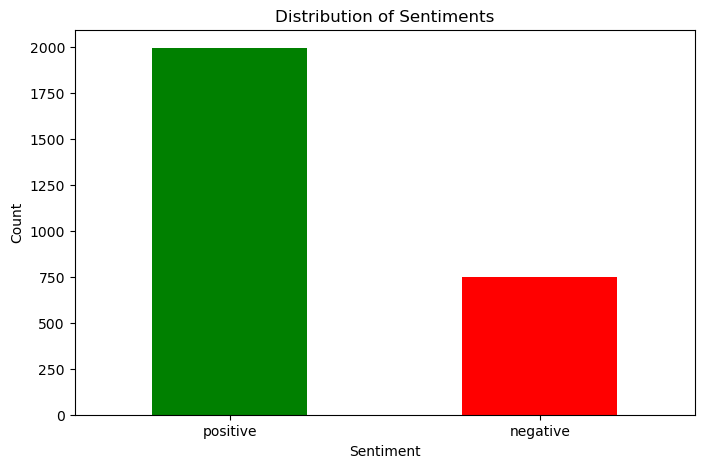

In [ ]:
plt.figure(figsize=(8, 5))
data['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Sentiment Proportions (Pie Chart)

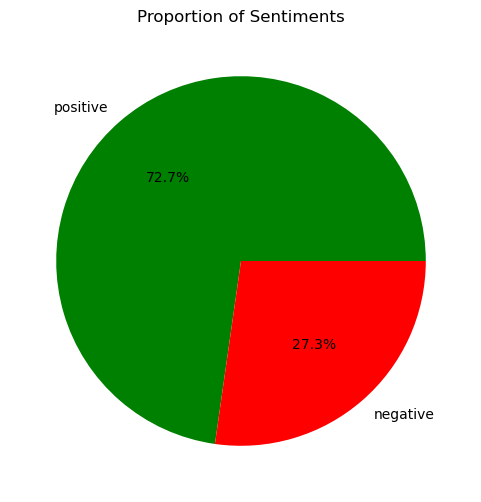

In [ ]:
plt.figure(figsize=(6, 6))
data['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Proportion of Sentiments')
plt.ylabel('')
plt.show()

### Review Length Distribution by Sentiment (Histogram)

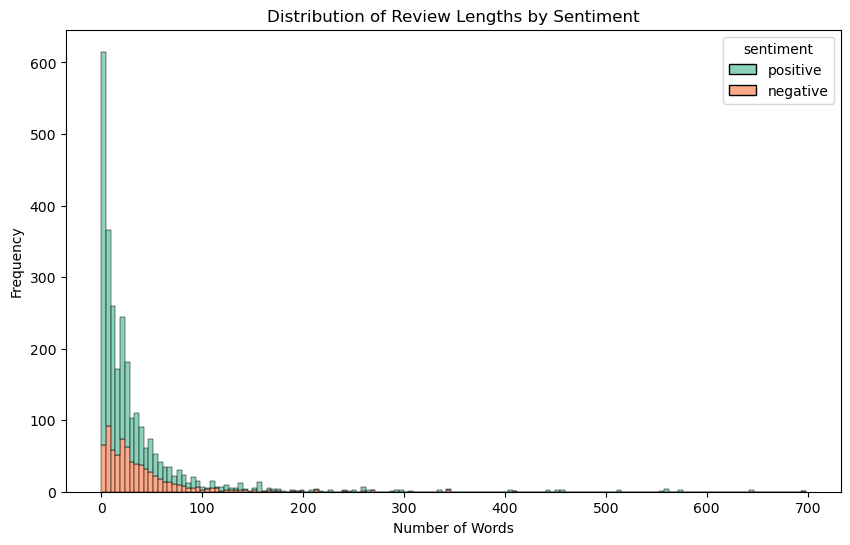

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='review_length', hue='sentiment', multiple='stack', palette='Set2')
plt.title('Distribution of Review Lengths by Sentiment')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

### Review Lengths by Sentiment (Box Plot)

/var/folders/z6/fz7p_t5j2zdcx0r2h3wlzzs80000gn/T/ipykernel_9941/658211385.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length', data=data, palette='Set2')


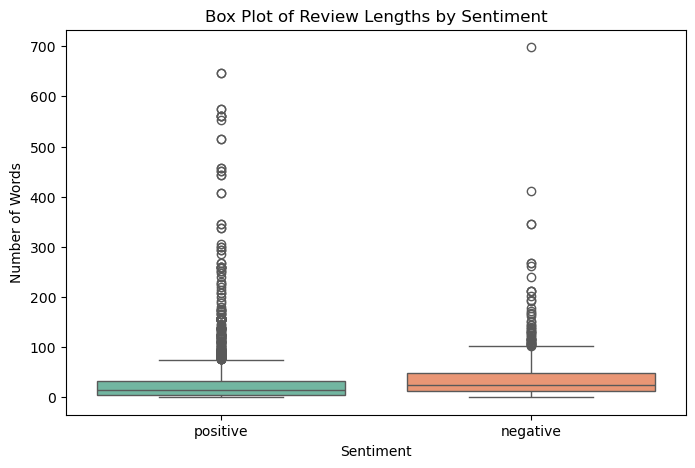

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='sentiment', y='review_length', data=data, palette='Set2')
plt.title('Box Plot of Review Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.show()

### Unigrams (Single Words)

In [ ]:
# Positive reviews
vectorizer_pos = CountVectorizer(stop_words='english')
X_pos = vectorizer_pos.fit_transform(positive_reviews)
word_freq_pos = X_pos.sum(axis=0)
words_pos = vectorizer_pos.get_feature_names_out()
freq_pos = word_freq_pos.A1
pos_word_freq = dict(zip(words_pos, freq_pos))

# Negative reviews
vectorizer_neg = CountVectorizer(stop_words='english')
X_neg = vectorizer_neg.fit_transform(negative_reviews)
word_freq_neg = X_neg.sum(axis=0)
words_neg = vectorizer_neg.get_feature_names_out()
freq_neg = word_freq_neg.A1
neg_word_freq = dict(zip(words_neg, freq_neg))

# Top 10 unigrams
print("\n### Word Frequency Analysis ###")
print("Top 10 words in positive reviews:", sorted(pos_word_freq.items(), key=lambda x: x[1], reverse=True)[:10])
print("Top 10 words in negative reviews:", sorted(neg_word_freq.items(), key=lambda x: x[1], reverse=True)[:10])

Top 10 words in positive reviews: [('phone', 895), ('iphone', 872), ('good', 719), ('battery', 491), ('camera', 417), ('great', 298), ('like', 290), ('product', 287), ('quality', 278), ('new', 272)]
Top 10 words in negative reviews: [('phone', 553), ('iphone', 237), ('apple', 192), ('amazon', 183), ('battery', 153), ('product', 146), ('buy', 118), ('camera', 106), ('good', 106), ('service', 106)]


### Word clouds

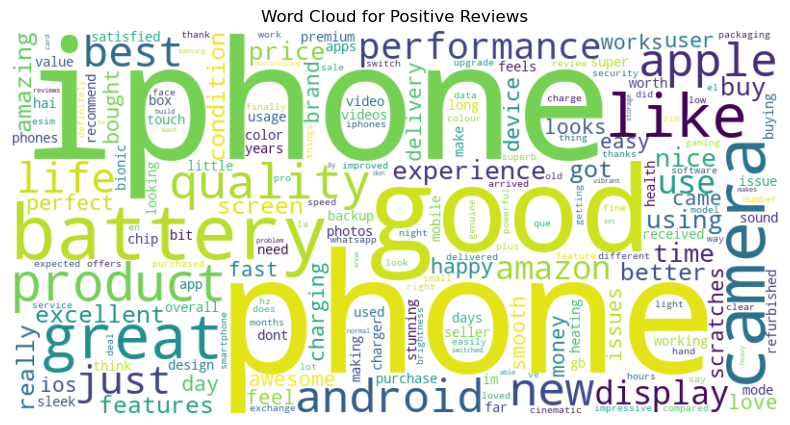

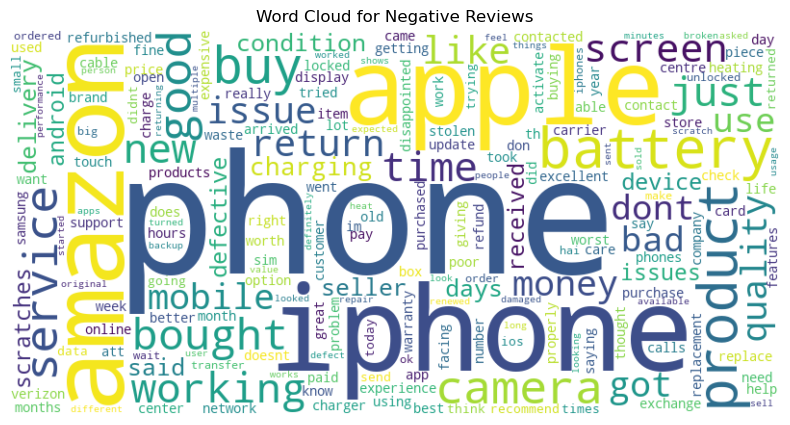

In [22]:
plt.figure(figsize=(10, 5))
pos_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(pos_word_freq)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

plt.figure(figsize=(10, 5))
neg_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(neg_word_freq)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

# Named Entity Recognition (NER)

In [23]:
def extract_entities(text):
    doc = nlp(text)
    entities = {}
    for ent in doc.ents:
        if ent.label_ in ['PRODUCT', 'ORG', 'GPE', 'LOC', 'PERSON']:
            entities[ent.text] = ent.label_
    return entities

data['entities'] = data['cleaned_review'].apply(extract_entities)

In [24]:
# Collect entities by sentiment
pos_entities = []
for entities_dict in data[data['sentiment'] == 'positive']['entities']:
    pos_entities.extend([(ent, label) for ent, label in entities_dict.items()])

neg_entities = []
for entities_dict in data[data['sentiment'] == 'negative']['entities']:
    neg_entities.extend([(ent, label) for ent, label in entities_dict.items()])

In [25]:
# Top entities
pos_entity_counter = Counter(pos_entities)
neg_entity_counter = Counter(neg_entities)
print("\n### Named Entity Recognition ###")
print("Top 10 entities in positive reviews:", pos_entity_counter.most_common(10))
print("Top 10 entities in negative reviews:", neg_entity_counter.most_common(10))


### Named Entity Recognition ###
Top 10 entities in positive reviews: [(('android', 'ORG'), 27), (('samsung', 'ORG'), 13), (('un', 'ORG'), 12), (('retina xdr', 'PERSON'), 10), (('hai', 'GPE'), 8), (('muy', 'ORG'), 8), (('n’t', 'GPE'), 5), (('max', 'PERSON'), 5), (('india', 'GPE'), 5), (('la', 'GPE'), 5)]
Top 10 entities in negative reviews: [(('samsung', 'ORG'), 12), (('android', 'ORG'), 11), (('n’t', 'GPE'), 6), (('imei', 'PERSON'), 6), (('india', 'GPE'), 5), (('¦', 'PERSON'), 5), (('😔', 'ORG'), 3), (('ho raha', 'PERSON'), 3), (('hai', 'GPE'), 3), (('bur', 'PERSON'), 2)]


In [26]:
# Extract and visualize entity types
def extract_entity_types(entities_dict):
    return [label for ent, label in entities_dict.items()]

data['entity_types'] = data['entities'].apply(extract_entity_types)

# Flatten entity types by sentiment
pos_entity_types = [t for types in data[data['sentiment'] == 'positive']['entity_types'] for t in types]
neg_entity_types = [t for types in data[data['sentiment'] == 'negative']['entity_types'] for t in types]

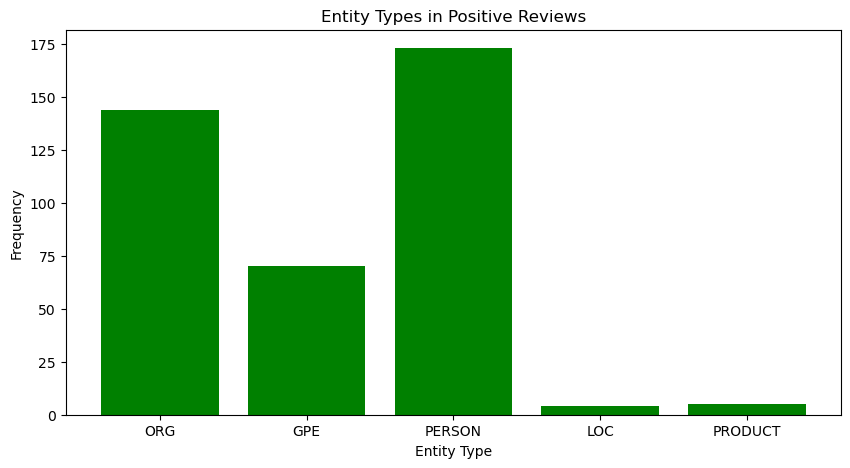

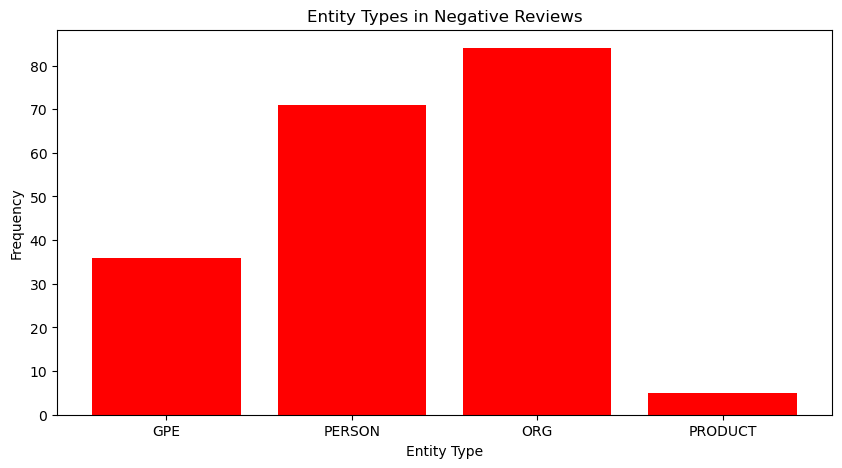

In [27]:
# Plot entity type frequencies
pos_entity_type_counter = Counter(pos_entity_types)
neg_entity_type_counter = Counter(neg_entity_types)

plt.figure(figsize=(10, 5))
plt.bar(pos_entity_type_counter.keys(), pos_entity_type_counter.values(), color='green')
plt.title('Entity Types in Positive Reviews')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(neg_entity_type_counter.keys(), neg_entity_type_counter.values(), color='red')
plt.title('Entity Types in Negative Reviews')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.show()

## Data Quality Issues

In [28]:
# Short reviews
short_reviews = data[data['review_length'] < 5]
print("Number of reviews with less than 5 words:", len(short_reviews))
print("Sample short reviews:\n", short_reviews[['reviewDescription', 'ratingScore']].head())

Number of reviews with less than 5 words: 615
Sample short reviews:
    reviewDescription  ratingScore
3       100% genuine            5
5           5 star 👍            5
7    Good product 😀💯            5
8       Nice product            4
9  Excellent product            5


In [29]:
# Sentiment distribution of short reviews
print("\nSentiment distribution of short reviews (<5 words):")
print(short_reviews['sentiment'].value_counts())


Sentiment distribution of short reviews (<5 words):
sentiment
positive    550
negative     65
Name: count, dtype: int64


In [30]:
# Duplicate reviews
duplicate_reviews = data[data.duplicated(subset=['reviewDescription'], keep=False)]
print("\nNumber of duplicate reviews:", len(duplicate_reviews))
print("Sample duplicate reviews:\n", duplicate_reviews[['reviewDescription', 'ratingScore']].head())


Number of duplicate reviews: 1160
Sample duplicate reviews:
                                    reviewDescription  ratingScore
0  Every thing is good about iPhones, there's not...            4
1  It look so fabulous, I am android user switche...            5
2  I tried to flip camera while recording but no ...            4
3                                       100% genuine            5
4         Happy to get the iPhone 13 in Amazon offer            5


In [31]:
# Check sentiment consistency in duplicates
duplicate_reviews_grouped = duplicate_reviews.groupby('reviewDescription')['sentiment'].nunique()
inconsistent_duplicates = duplicate_reviews_grouped[duplicate_reviews_grouped > 1]
print("\nNumber of duplicate reviews with inconsistent sentiments:", len(inconsistent_duplicates))
if len(inconsistent_duplicates) > 0:
    print("Examples of inconsistent duplicate reviews:")
    print(duplicate_reviews[duplicate_reviews['reviewDescription'].isin(inconsistent_duplicates.index)].head())


Number of duplicate reviews with inconsistent sentiments: 2
Examples of inconsistent duplicate reviews:
    reviewDescription  ratingScore cleaned_review sentiment  review_length  \
55               Good            5           good  positive              1   
102              Good            2           good  negative              1   
221              Good            5           good  positive              1   
237              Good            5           good  positive              1   
247              Good            5           good  positive              1   

    entities entity_types  
55        {}           []  
102       {}           []  
221       {}           []  
237       {}           []  
247       {}           []  


In [32]:
# Average review length by sentiment
avg_length_by_sentiment = data.groupby('sentiment')['review_length'].mean()
print("Average review length by sentiment:")
print(avg_length_by_sentiment)

Average review length by sentiment:
sentiment
negative    38.848728
positive    32.469408
Name: review_length, dtype: float64


In [36]:
# Statistical test for review length differences
pos_lengths = data[data['sentiment'] == 'positive']['review_length']
neg_lengths = data[data['sentiment'] == 'negative']['review_length']
t_stat, p_value = ttest_ind(pos_lengths, neg_lengths)
print(f"\nT-test for review length differences: t-statistic={t_stat:.2f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("Insight: Review lengths differ significantly between positive and negative sentiments (p < 0.05).")
else:
    print("Insight: No significant difference in review lengths between sentiments (p >= 0.05).")


T-test for review length differences: t-statistic=-2.45, p-value=0.0142
Insight: Review lengths differ significantly between positive and negative sentiments (p < 0.05).
